# 04_specific_linkages 
Create dimmers with all linkages and monomer combination

In [1]:
# set ligning path (optional if installed via pip)
import sys, os
project_path = os.path.abspath(os.path.join(os.getcwd(), '..\..\..'))
print(project_path)
sys.path.insert(0, project_path)

import os
import ligning.monomer as mono
import ligning.polymer as poly
import ligning.utils as ut
from ligning.rules import monomer1_select_monomer2_linkage_name
import time 
from rdkit.Chem.Descriptors import ExactMolWt

output_path = os.path.join(os.getcwd(), 'demo_results', 'molecules')


c:\Users\yifan\Documents\GitHub\LigninGraphs


RDKit WARNING: [17:52:14] Enabling RDKit 2019.09.3 jupyter extensions


Connect a H to a H unit (in polymer) via a alpha-O-4 bond
Connect a H to a H unit (in polymer) via a beta-O-4 bond
Connect a H to a H unit (in polymer) via a 5-5 bond
Connect a H to a H unit (in polymer) via a beta-5 bond
Connect a H to a H unit (in polymer) via a beta-beta bond
Connect a H to a H unit (in polymer) via a beta-1 bond
Connect a H to a G unit (in polymer) via a 4-O-5 bond
Connect a H to a G unit (in polymer) via a alpha-O-4 bond
Connect a H to a G unit (in polymer) via a beta-O-4 bond
Connect a H to a G unit (in polymer) via a 5-5 bond
Connect a H to a G unit (in polymer) via a beta-5 bond
Connect a H to a G unit (in polymer) via a beta-beta bond
Connect a H to a G unit (in polymer) via a beta-1 bond
Connect a H to a S unit (in polymer) via a alpha-O-4 bond
Connect a H to a S unit (in polymer) via a beta-O-4 bond
Connect a H to a S unit (in polymer) via a beta-beta bond
Connect a H to a S unit (in polymer) via a beta-1 bond
Connect a G to a H unit (in polymer) via a 4-O-5

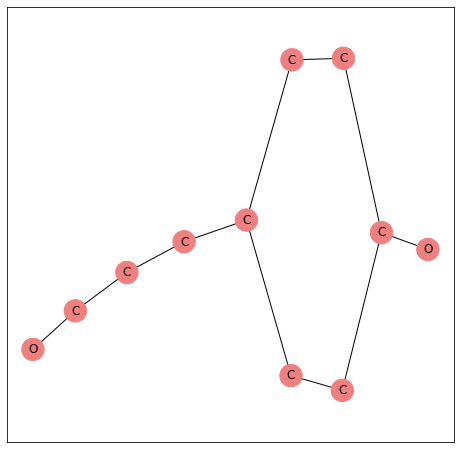

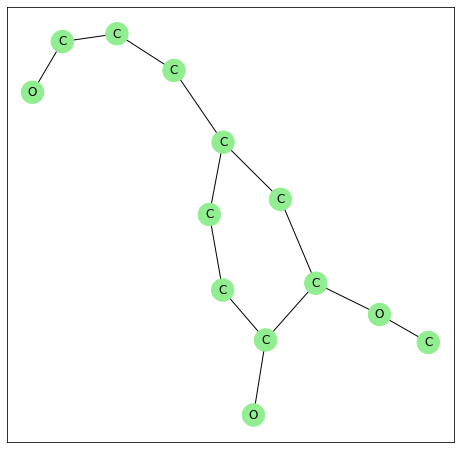

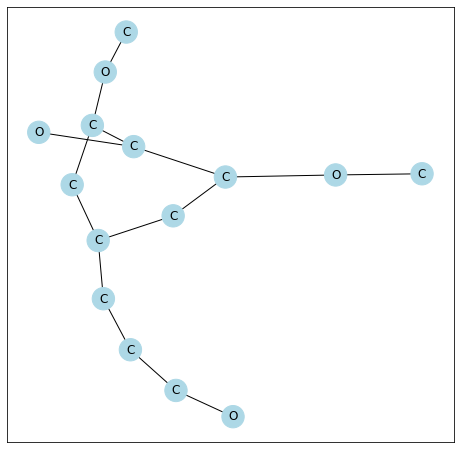

In [2]:
start = time.time()

H_G = mono.monomer_H()
G_G = mono.monomer_G()
S_G = mono.monomer_S()

# Initialize monomer objects
H = mono.Monomer('H')
H_G = H.create()

G = mono.Monomer('G')
G_G = G.create()

S = mono.Monomer('S')
S_G = S.create()

# Draw the connected graph
ut.draw_atomic_graph(H_G)
H_mol = ut.graph_to_mol(H_G, save_mol=True, name='H', save_path=output_path)

ut.draw_atomic_graph(G_G)
G_mol = ut.graph_to_mol(G_G, save_mol=True, name='G', save_path=output_path)

ut.draw_atomic_graph(S_G)
S_mol = ut.graph_to_mol(S_G, save_mol=True, name='S', save_path=output_path)

#%%
# Test all combination for H
H_dimer_mols = []
H_dimmer_MW = []
for monomer_i in list(monomer1_select_monomer2_linkage_name['H'].keys()):
    for linkage_i in list(monomer1_select_monomer2_linkage_name['H'][monomer_i]):
        # initialize the polymer object with a monomer
        polymer_h = poly.Polymer(H)
        # add a bond monomer combinationH, 
        #print(linkage_i)
        is_formed = polymer_h.add_specific_monomer(monomer_i, linkage_i)
        # if a new linkage is formed
        # save the mol and compute MW
        if is_formed:
            dimmer_name = 'H' + '_' + linkage_i + '_' + monomer_i
            dimer_mol = ut.graph_to_mol(polymer_h.G, save_mol=True, name=dimmer_name, save_path=output_path)
            H_dimer_mols.append(dimer_mol)
            H_dimmer_MW.append(ExactMolWt(ut.graph_to_mol(polymer_h.G)))


# Test all combination for G
G_dimer_mols = []
G_dimmer_MW = []
for monomer_i in list(monomer1_select_monomer2_linkage_name['G'].keys()):
    for linkage_i in list(monomer1_select_monomer2_linkage_name['G'][monomer_i]):
        # initialize the polymer object with a monomer
        polymer_g = poly.Polymer(G)
        # add a bond monomer combination
        is_formed = polymer_g.add_specific_monomer(monomer_i, linkage_i)
        # if a new linkage is formed
        # save the mol and compute MW
        if is_formed:
            dimmer_name = 'G' + '_' + linkage_i + '_' + monomer_i
            dimer_mol = ut.graph_to_mol(polymer_g.G, save_mol=True, name=dimmer_name, save_path=output_path)
            G_dimer_mols.append(dimer_mol)
            G_dimmer_MW.append(ExactMolWt(ut.graph_to_mol(polymer_g.G)))



# Test all combination for S
S_dimer_mols = []
S_dimmer_MW = []

for monomer_i in list(monomer1_select_monomer2_linkage_name['S'].keys()):
    for linkage_i in list(monomer1_select_monomer2_linkage_name['S'][monomer_i]):
        # initialize the polymer object with a monomer
        polymer_s = poly.Polymer(S)
        # add a bond monomer combination
        is_formed = polymer_s.add_specific_monomer(monomer_i, linkage_i)
        # if a new linkage is formed
        # save the mol and compute MW
        if is_formed:
            dimmer_name = 'S' + '_' + linkage_i + '_' + monomer_i
            dimer_mol = ut.graph_to_mol(polymer_s.G, save_mol=True, name=dimmer_name, save_path=output_path)
            S_dimer_mols.append(dimer_mol)
            S_dimmer_MW.append(ExactMolWt(ut.graph_to_mol(polymer_s.G)))

        
end = time.time()
run_time = end - start 
print("Lignin polymerization test takes %5.5f s" %(run_time))